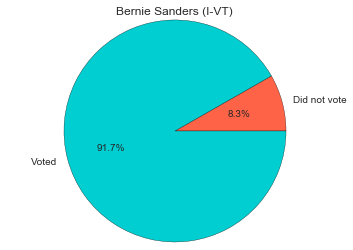

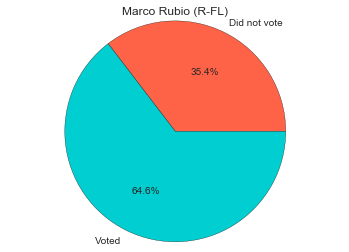

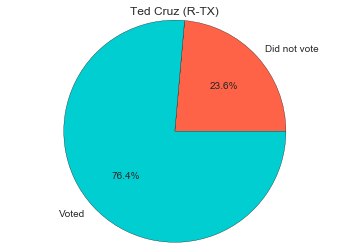

In [112]:
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import operator
from os import listdir

df = pd.read_csv('../data/rollCallVotes_cleaned.csv')

senators = df.ix[:,0:100]

percent_missed_votes = {}
for i in range(0, 100):
    indiv_senator = senators.ix[:, i]
    no_missed = len(indiv_senator[indiv_senator == 'Not Voting'])
    no_total = len(indiv_senator)
    percent_missed_votes[indiv_senator.name] = float(no_missed)/no_total

    
candidates = ['Bernie Sanders (I-VT)', 'Marco Rubio (R-FL)', 'Ted Cruz (R-TX)']
labels = 'Did not vote', 'Voted'
colors = ['tomato', 'darkturquoise']

for candidate in candidates:    
    plt.pie([percent_missed_votes[candidate]*100, 100 - percent_missed_votes[candidate]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(candidate)
    plt.show()

In [113]:
sorted_missed_votes = sorted(percent_missed_votes.items(), key=operator.itemgetter(1))[::-1]
for i in range(0, 10):
    print str(sorted_missed_votes[i][0]) + ' missed', str(sorted_missed_votes[i][1]*100)[0:5] + ' percent of votes'

Marco Rubio (R-FL) missed 35.39 percent of votes
Lindsey Graham (R-SC) missed 28.31 percent of votes
Ted Cruz (R-TX) missed 23.59 percent of votes
David Vitter (R-LA) missed 16.81 percent of votes
Harry Reid (D-NV) missed 16.51 percent of votes
Barbara Boxer (D-CA) missed 10.91 percent of votes
Bernie Sanders (I-VT) missed 8.259 percent of votes
Bill Nelson (D-FL) missed 7.079 percent of votes
Mark Kirk (R-IL) missed 6.489 percent of votes
Mike Lee (R-UT) missed 5.899 percent of votes


In [217]:
senators = ['Elizabeth Warren (D-MA)', 'Edward Markey (D-MA)', 'Dan Sullivan (R-AK)', 'Gary Peters (D-MI)']
subjects = ['Alternative and renewable resources', 'Health care costs and insurance', 'Refugees, asylum, displaced persons']
percent_voted_yea = np.zeros((len(subjects), len(senators)))

def votes_on_subject(senator, subject):
    subject_df = df[df[subject] == 1]
    senator_subject = subject_df[senator]
    yeas = len(senator_subject[senator_subject == 'Yea'])
    nays = len(senator_subject[senator_subject == 'Nay'])
    percent_voted_yea = float(yeas) / (yeas + nays)
    return percent_voted_yea

for i in range(0, len(subjects)):
    for j in range(0, len(senators)):
        percent_voted_yea[i, j] = votes_on_subject(senators[j], subjects[i])

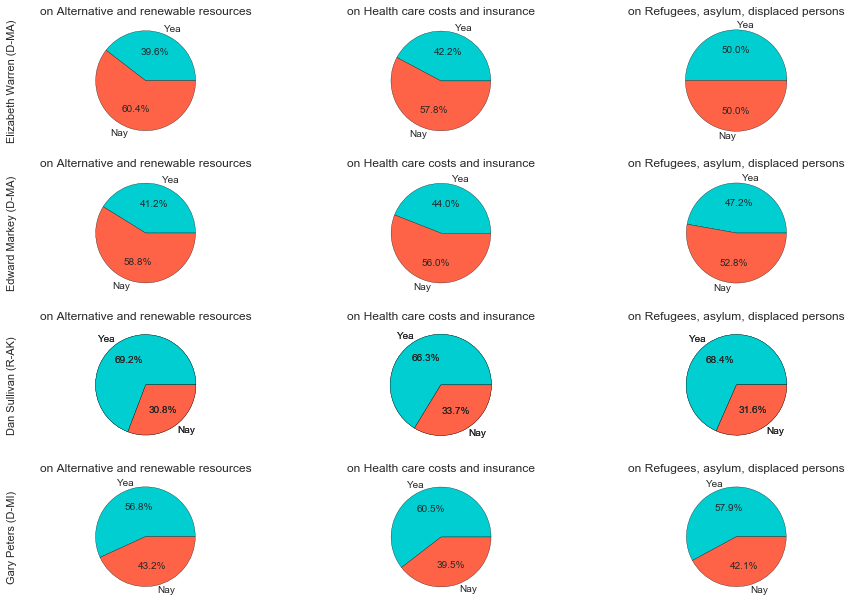

In [218]:
labels = 'Yea', 'Nay'
colors = ['darkturquoise', 'tomato']


fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.5)

#Warren
plt.subplot(4, 3, 1)
plt.pie([percent_voted_yea[0, 0]*100, 100 - percent_voted_yea[0,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Elizabeth Warren (D-MA)')

plt.subplot(4, 3, 2)
plt.pie([percent_voted_yea[1, 0]*100, 100 - percent_voted_yea[1,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 3)
plt.pie([percent_voted_yea[2, 0]*100, 100 - percent_voted_yea[2,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

#Markey
plt.subplot(4, 3, 4)
plt.pie([percent_voted_yea[0, 1]*100, 100 - percent_voted_yea[0,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Edward Markey (D-MA)')

plt.subplot(4, 3, 5)
plt.pie([percent_voted_yea[1, 1]*100, 100 - percent_voted_yea[1,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 6)
plt.pie([percent_voted_yea[2, 1]*100, 100 - percent_voted_yea[1,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

#Sullivan
plt.subplot(4, 3, 7)
plt.pie([percent_voted_yea[0, 2]*100, 100 - percent_voted_yea[0,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Dan Sullivan (R-AK)')

plt.subplot(4, 3, 8)
plt.pie([percent_voted_yea[1, 2]*100, 100 - percent_voted_yea[1,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 9)
plt.pie([percent_voted_yea[2, 2]*100, 100 - percent_voted_yea[2,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

#Sullivan
plt.subplot(4, 3, 7)
plt.pie([percent_voted_yea[0, 2]*100, 100 - percent_voted_yea[0,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Dan Sullivan (R-AK)')

plt.subplot(4, 3, 8)
plt.pie([percent_voted_yea[1, 2]*100, 100 - percent_voted_yea[1,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 9)
plt.pie([percent_voted_yea[2, 2]*100, 100 - percent_voted_yea[2,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

#Peters
plt.subplot(4, 3, 10)
plt.pie([percent_voted_yea[0, 3]*100, 100 - percent_voted_yea[0,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Gary Peters (D-MI)')

plt.subplot(4, 3, 11)
plt.pie([percent_voted_yea[1, 3]*100, 100 - percent_voted_yea[1,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 12)
plt.pie([percent_voted_yea[2, 3]*100, 100 - percent_voted_yea[2,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

plt.show()